https://www.kaggle.com/code/shubhobratadas/knn-classifier-on-breast-cancer-wisconsin-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
folder = '/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/'

In [ ]:
import pandas as pd

read_file = pd.read_csv (r'/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/breast-cancer-wisconsin.data.txt')
read_file.to_csv (r'/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/breast-cancer-wisconsin.data.csv', index=None)

In [ ]:
import pandas as pd
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/breast-cancer-wisconsin.data.csv')
data

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# adding column name to the respective columns
data.columns =['code_number', 'Clump_Thickness', 'Cell_Size_Uniformity', 'Cell Shape_Uniformity','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Chromatin','Normal_Nucleoli','Mitoses','Class']
# displaying the DataFrame
print(data)

     code_number  Clump_Thickness  Cell_Size_Uniformity  \
0        1002945                5                     4   
1        1015425                3                     1   
2        1016277                6                     8   
3        1017023                4                     1   
4        1017122                8                    10   
..           ...              ...                   ...   
693       776715                3                     1   
694       841769                2                     1   
695       888820                5                    10   
696       897471                4                     8   
697       897471                4                     8   

     Cell Shape_Uniformity  Marginal_Adhesion  Epithelial_Cell_Size  \
0                        4                  5                     7   
1                        1                  1                     2   
2                        8                  1                     3   
3      

In [ ]:
data.shape

(698, 11)

In [ ]:
data['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

In [ ]:
# Preprocess the data
#replacing all the datapoints that have no value with -99999
data.replace('?',-99999, inplace=True)
print(data.axes)
#changing the value of the column id =1 as machine learning screening on id will not provide us insight
data.drop(['code_number'], 1, inplace=True)

[RangeIndex(start=0, stop=698, step=1), Index(['code_number', 'Clump_Thickness', 'Cell_Size_Uniformity',
       'Cell Shape_Uniformity', 'Marginal_Adhesion', 'Epithelial_Cell_Size',
       'Bare_Nuclei', 'Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')]


<ipython-input-49-324defb5ea83>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['code_number'], 1, inplace=True)


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define input and output
X = np.array(data.iloc[:, 1:])
y = np.array(data['Class'])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(558, 9)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

X_train


array([[ 2.3758106 ,  2.3789686 ,  1.83637044, ...,  2.41642213,
        -0.32521474,  1.41421356],
       [ 0.67401045,  0.64779427,  2.54062797, ...,  0.74434432,
         4.17935538,  1.41421356],
       [-0.68742966, -0.7371452 , -0.62853091, ..., -0.25890237,
        -0.32521474, -0.70710678],
       ...,
       [-0.34706964, -0.39091033, -0.62853091, ..., -0.59331793,
        -0.32521474, -0.70710678],
       [-0.68742966, -0.7371452 , -0.62853091, ..., -0.25890237,
        -0.32521474, -0.70710678],
       [ 0.33365042, -0.39091033, -0.62853091, ..., -0.59331793,
         0.31829528, -0.70710678]])

In [ ]:
X_test=scaler.fit_transform(X_test)

X_test

array([[ 1.86817475,  1.36989283,  0.71911639, ..., -0.68963131,
        -0.41970437,  1.24316312],
       [-0.76188132, -0.77809913, -0.65530401, ..., -0.68963131,
        -0.41970437, -0.80439967],
       [ 0.11480403,  0.14246885, -0.31169891, ..., -0.68963131,
        -0.41970437, -0.80439967],
       ...,
       [-0.76188132, -0.77809913, -0.65530401, ..., -0.68963131,
        -0.41970437, -0.80439967],
       [-0.76188132, -0.77809913, -0.65530401, ..., -0.68963131,
        -0.41970437, -0.80439967],
       [-0.76188132, -0.77809913, -0.65530401, ..., -0.38312851,
        -0.41970437, -0.80439967]])

In [ ]:
np.sqrt(X_train.shape[0])

23.62202362203543

In [ ]:
k=24

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_jobs=k)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=24)

In [ ]:
y_pred=knn.predict(X_test)

y_pred.shape

(140,)

In [ ]:
y_test.shape

(140,)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[85,  0],
       [ 0, 55]])

In [ ]:
accuracy=[]

for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))


In [ ]:
accuracy

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9928571428571429,
 0.9928571428571429,
 0.9928571428571429,
 0.9928571428571429,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858]

In [ ]:
len(accuracy)

49

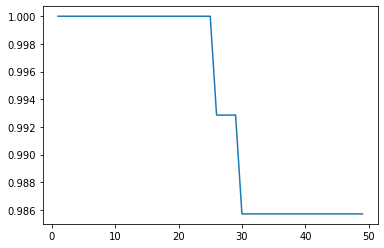

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,50),accuracy)

In [ ]:
k=5

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
accuracy_score(y_pred,y_test)

1.0

So we can see that when we select k=24 we get an accuracy of 100 and when we select k=5 we also can get an accuracy of 100 hence value of k is to be selected as either 5 or 24 for this knn classifier .